In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV file
data = pd.read_csv('Data.csv')

In [26]:
# First rows of the dataset
data.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,...,Feature-20,Feature-21,Feature-22,Feature-23,Feature-24,Feature-25,Feature-26,Feature-27,Feature-28,label
0,0.421100,0.311280,0.310160,0.353980,0.105571,-0.175377,0.091689,0.420820,0.306320,0.310420,...,-0.193568,0.095023,0.388280,0.273980,0.285980,0.330560,0.105511,-0.177666,0.116607,0
1,0.423193,0.290619,0.254927,0.281671,0.137560,-0.244459,0.019792,0.431956,0.301435,0.257873,...,-0.239738,0.043115,0.379723,0.252394,0.238974,0.265378,0.135794,-0.245699,0.070134,1
2,0.319944,0.240518,0.192145,0.214765,0.104318,-0.246053,-0.044005,0.343052,0.246591,0.211662,...,-0.236559,0.004437,0.333574,0.236871,0.211484,0.236254,0.110759,-0.240793,0.024197,0
3,0.284980,0.215349,0.200726,0.220252,0.071626,-0.162805,0.019107,0.285095,0.207685,0.209087,...,-0.179621,0.087678,0.256530,0.185122,0.184672,0.205522,0.076848,-0.156871,0.059417,1
4,0.250840,0.165840,0.168420,0.196660,0.146182,-0.206290,0.109897,0.254640,0.167140,0.176960,...,-0.198952,0.131649,0.248810,0.160760,0.172700,0.200670,0.137797,-0.197421,0.116308,1


In [27]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature-1   9168 non-null   float64
 1   Feature-2   9168 non-null   float64
 2   Feature-3   9168 non-null   float64
 3   Feature-4   9168 non-null   float64
 4   Feature-5   9168 non-null   float64
 5   Feature-6   9168 non-null   float64
 6   Feature-7   9168 non-null   float64
 7   Feature-8   9168 non-null   float64
 8   Feature-9   9168 non-null   float64
 9   Feature-10  9168 non-null   float64
 10  Feature-11  9168 non-null   float64
 11  Feature-12  9168 non-null   float64
 12  Feature-13  9168 non-null   float64
 13  Feature-14  9168 non-null   float64
 14  Feature-15  9168 non-null   float64
 15  Feature-16  9168 non-null   float64
 16  Feature-17  9168 non-null   float64
 17  Feature-18  9168 non-null   float64
 18  Feature-19  9168 non-null   float64
 19  Feature-20  9168 non-null  

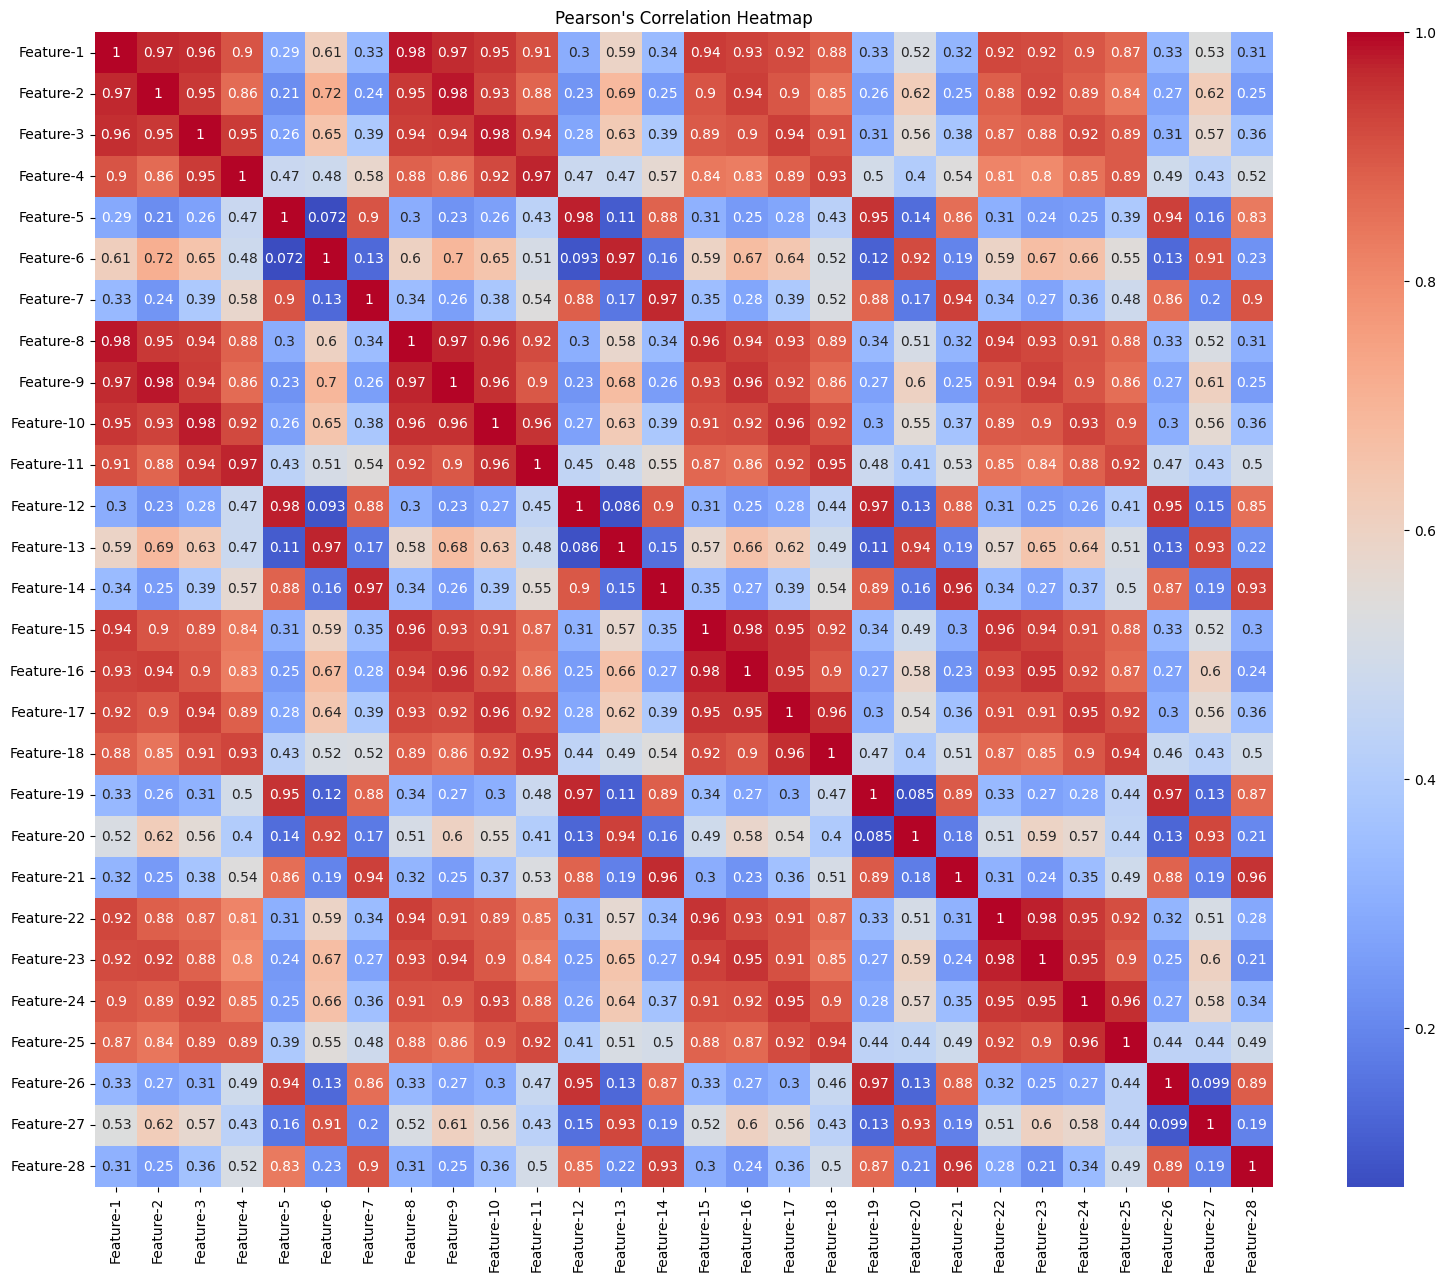

In [13]:
# Calculate correlation between feature columns
correlation_matrix = data.iloc[:, :-1].corr()

# Set the range between 0 and 1
correlation_matrix = (correlation_matrix + 1)/2

# Visualize the correlations
plt.figure(figsize=(19, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Pearson's Correlation Heatmap")
plt.show()

Βλέπω οτι υπάρχουν τετράδες από features που έχουν μεγάλη συσχέτιση μεταξύ τους οπότε μπορούμε να αντικαταστήσουμε αυτές τις (4*4=16) στήλες με μία αντιπροσωπευτική από αυτές. Παρατηρώ όμως και άλλες συσχετίσης μεταξύ των features οπότε αναδρομικά θα φιλτράρω τα δεδομένα μέχρι τα features που θα απομείνουν να έχουν correlation μικρότερο από 0.8 μεταξύ τους.

In [35]:
def is_categorical(column):
    unique_values = column.unique()
    num_unique_values = len(unique_values)
    num_total_values = len(column)

    # If the number of unique values is relatively small compared to the total values, it's likely categorical
    threshold = 0.05  # threshold based on dataset

    if num_unique_values / num_total_values <= threshold:
        return True
    else:
        return False

def check_categorical_columns(data):
    categorical_columns = []
    non_categorical_columns = []

    for column in data.columns:
        is_cat = is_categorical(data[column])
        if is_cat:
            categorical_columns.append(column)
        else:
            non_categorical_columns.append(column)

    return categorical_columns, non_categorical_columns

# Example usage
categorical_cols, non_categorical_cols = check_categorical_columns(data)

print("Categorical columns:")
print(categorical_cols)

print("\nNon-categorical columns:")
print(non_categorical_cols)

Categorical columns:
['label']

Non-categorical columns:
['Feature-11', 'Feature-13', 'Feature-21']


In [15]:
def PearsonCorrelation(data):
  # Calculate correlation between feature columns
  correlation_matrix = data.iloc[:, :-1].corr()

  # Set the range between 0 and 1
  correlation_matrix = (correlation_matrix + 1)/2

  # Visualize the correlations
  plt.figure(figsize=(19, 15))
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
  plt.title("Pearson's Correlation Heatmap")
  plt.show()

  return correlation_matrix

In [16]:
def CorrelatingFiltering(data, correlation_matrix):
  # Avg correlation for each feature
  average_correlations = correlation_matrix.abs().mean()

  # Highest avg correlation
  feature_with_max_average_correlation = average_correlations.idxmax()
  max_average_correlation_value = average_correlations.max()

  print("Feature with the highest average correlation:", feature_with_max_average_correlation)
  print("Max average correlation value:", max_average_correlation_value)

  # Get the columns with correlation lower than 0.8 with the specific column
  low_correlation_columns = correlation_matrix[(correlation_matrix[feature_with_max_average_correlation] < 0.8) | (correlation_matrix[feature_with_max_average_correlation] == 1)].index

  # Last column with labels
  low_correlation_columns = low_correlation_columns.append(pd.Index([data.columns[-1]]))
  
  # Filter the columns and keep the desired ones
  data_filtered = data[low_correlation_columns]

  # Confirm the dropped columns
  dropped_columns = data.columns.difference(data_filtered.columns)
  if dropped_columns.empty:
    return data, False
  else:
    print("Dropped columns:", dropped_columns)
    return data_filtered, True

In [17]:
def FeatureInfo(data):
  # Get statistics of the features
  statistics = data.describe()
  print(statistics)

  # Number of rows and columns for the grid
  num_features = len(data.columns) - 1  
  num_rows = (num_features - 1) // 3 + 1
  num_cols = min(3, num_features)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
  axes = axes.flatten()

  # Distribution of each feature
  for i, column in enumerate(data.columns):
      if column not in categorical_cols:  
          sns.histplot(data[column], kde=True, ax=axes[i])
          axes[i].set_xlabel(column)
          axes[i].set_ylabel('Frequency')
          axes[i].set_title(f'Distribution of {column}')

  fig.tight_layout()
  plt.show()

  # Label's class distribution
  class_counts = data['label'].value_counts()

  plt.figure(figsize=(8, 6))
  sns.countplot(data=data, x='label')
  plt.xlabel('Label')
  plt.ylabel('Count')
  plt.title('Class Distribution')
  plt.show()

  feature_columns = data.drop('label', axis=1)

  # Plot pair-wise interactions between features
  sns.pairplot(data=feature_columns)
  plt.show()

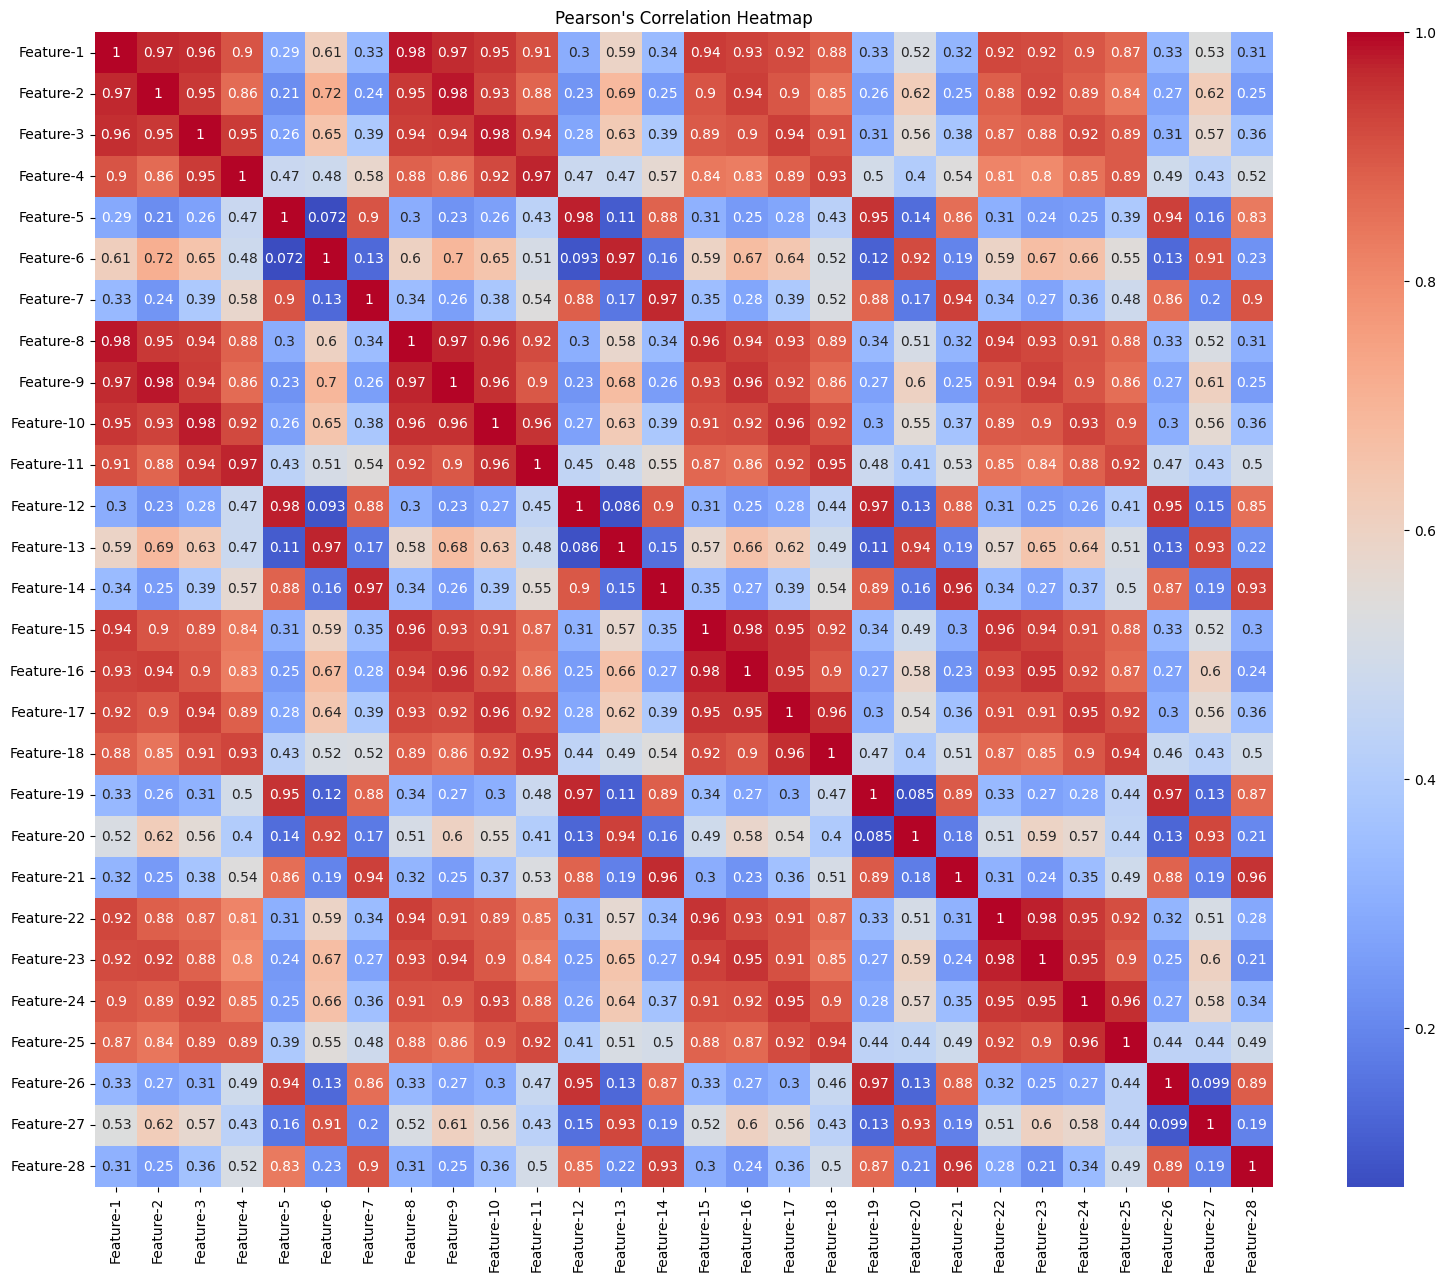

Feature with the highest average correlation: Feature-11
Max average correlation value: 0.7259741912400369
Dropped columns: Index(['Feature-1', 'Feature-10', 'Feature-15', 'Feature-16', 'Feature-17',
       'Feature-18', 'Feature-2', 'Feature-22', 'Feature-23', 'Feature-24',
       'Feature-25', 'Feature-3', 'Feature-4', 'Feature-8', 'Feature-9'],
      dtype='object')


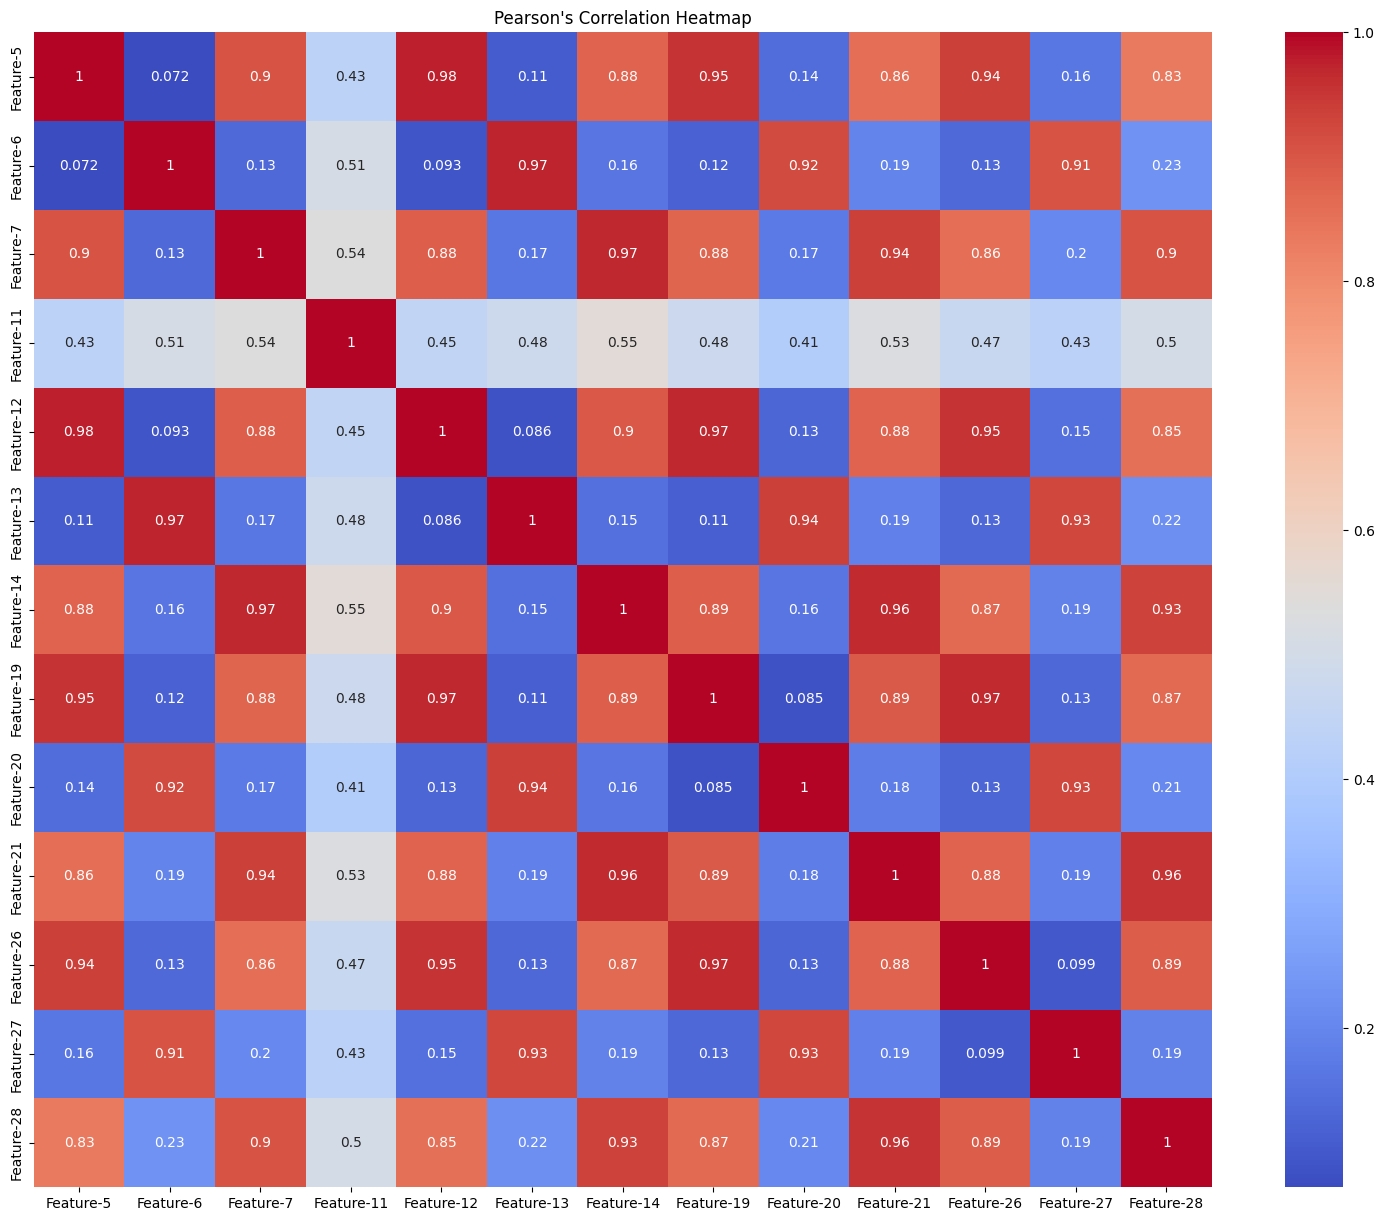

Feature with the highest average correlation: Feature-21
Max average correlation value: 0.6641006748750773
Dropped columns: Index(['Feature-12', 'Feature-14', 'Feature-19', 'Feature-26', 'Feature-28',
       'Feature-5', 'Feature-7'],
      dtype='object')


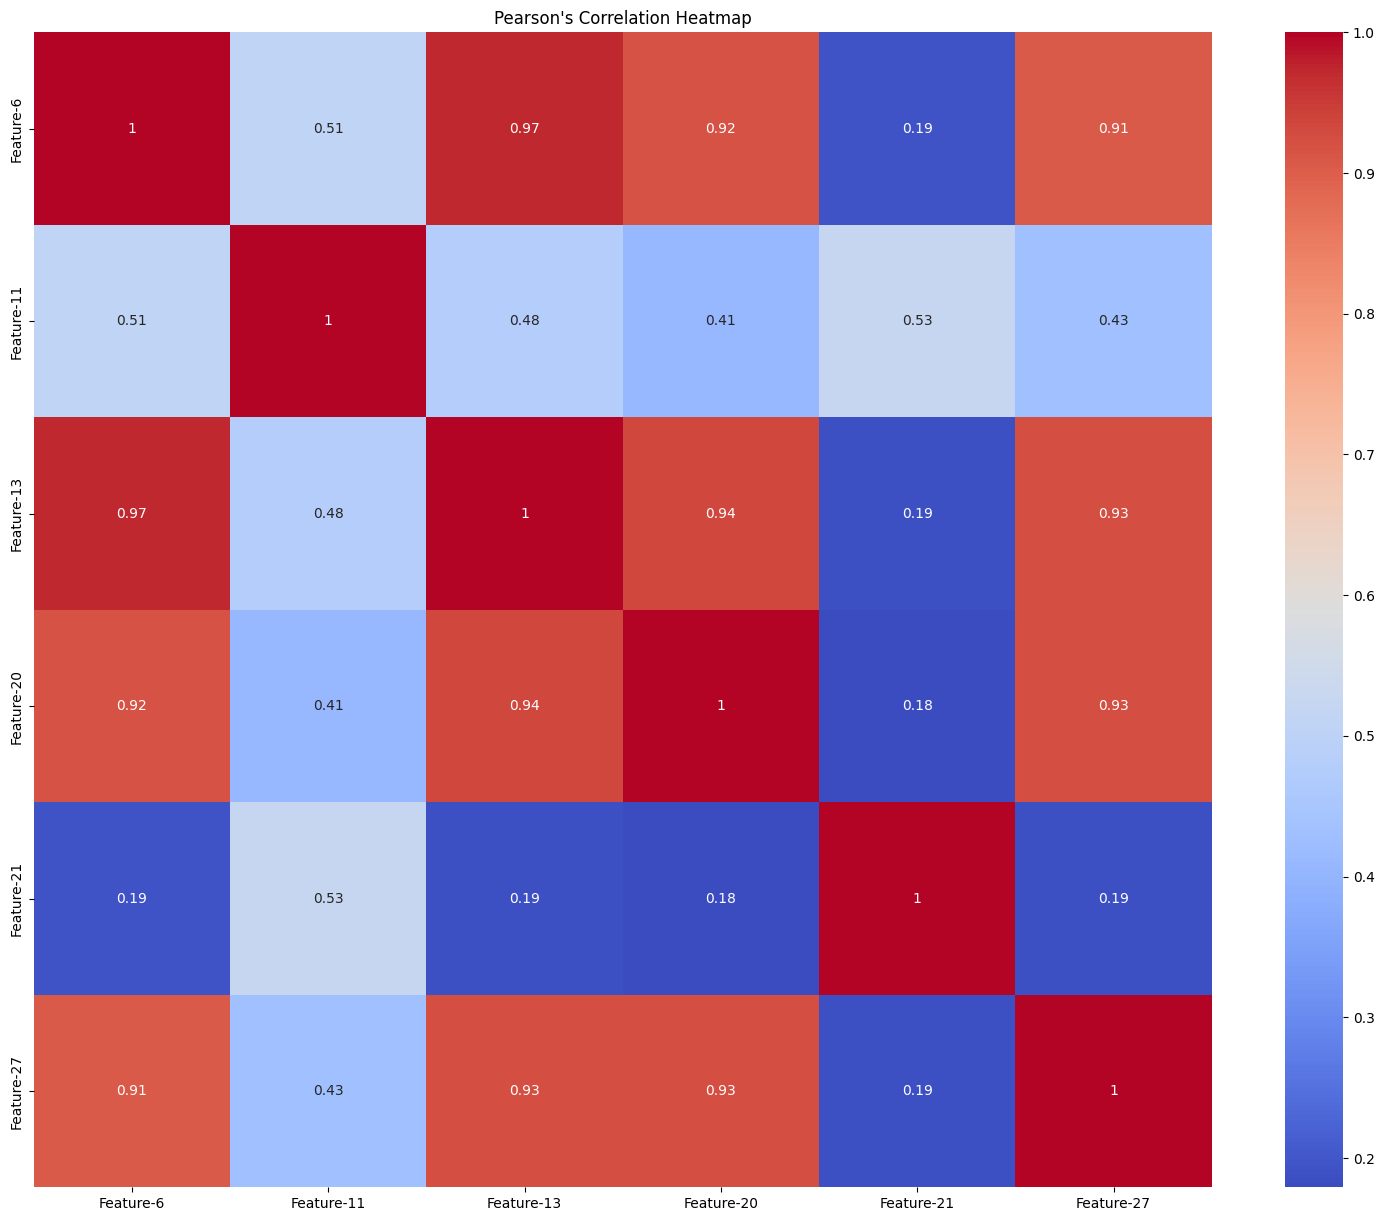

Feature with the highest average correlation: Feature-13
Max average correlation value: 0.7499369780327853
Dropped columns: Index(['Feature-20', 'Feature-27', 'Feature-6'], dtype='object')


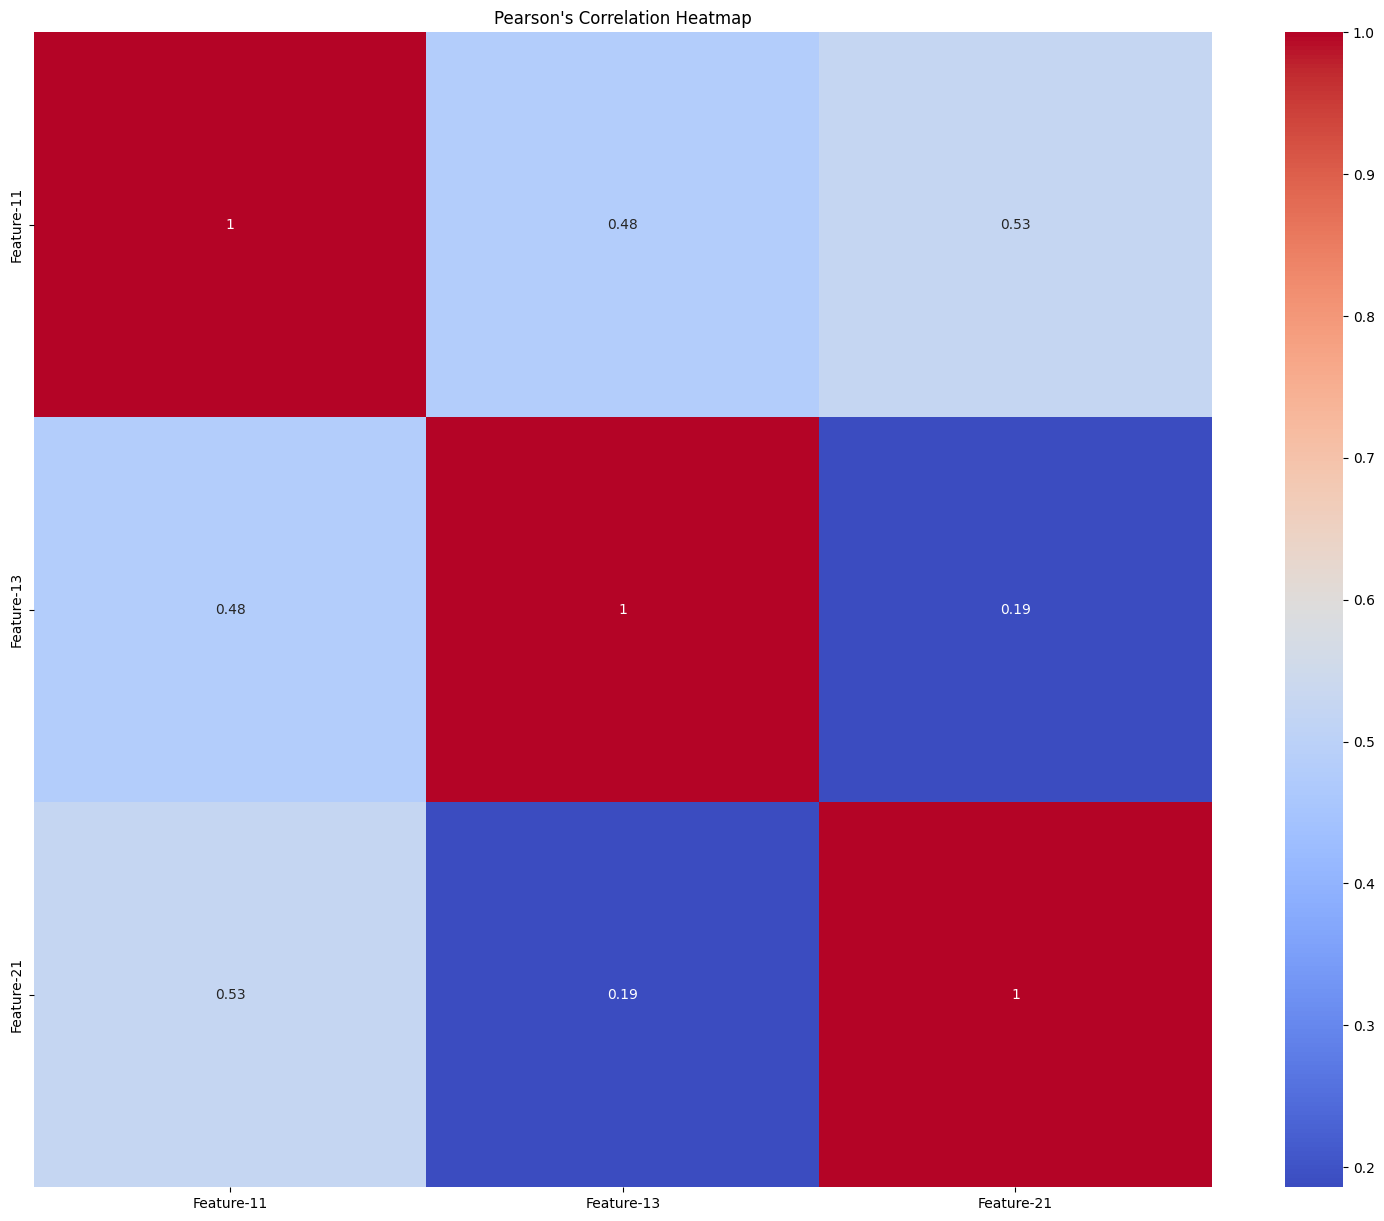

Feature with the highest average correlation: Feature-11
Max average correlation value: 0.668480449315128
        Feature-11   Feature-13   Feature-21        label
count  9168.000000  9168.000000  9168.000000  9168.000000
mean      0.255839    -0.284163     0.117858     0.703752
std       0.054587     0.065754     0.097561     0.456627
min       0.104520    -0.622366    -0.256206     0.000000
25%       0.214360    -0.321518     0.050894     0.000000
50%       0.250598    -0.280229     0.109694     1.000000
75%       0.288002    -0.244206     0.168019     1.000000
max       0.613573     0.114290     0.666307     1.000000


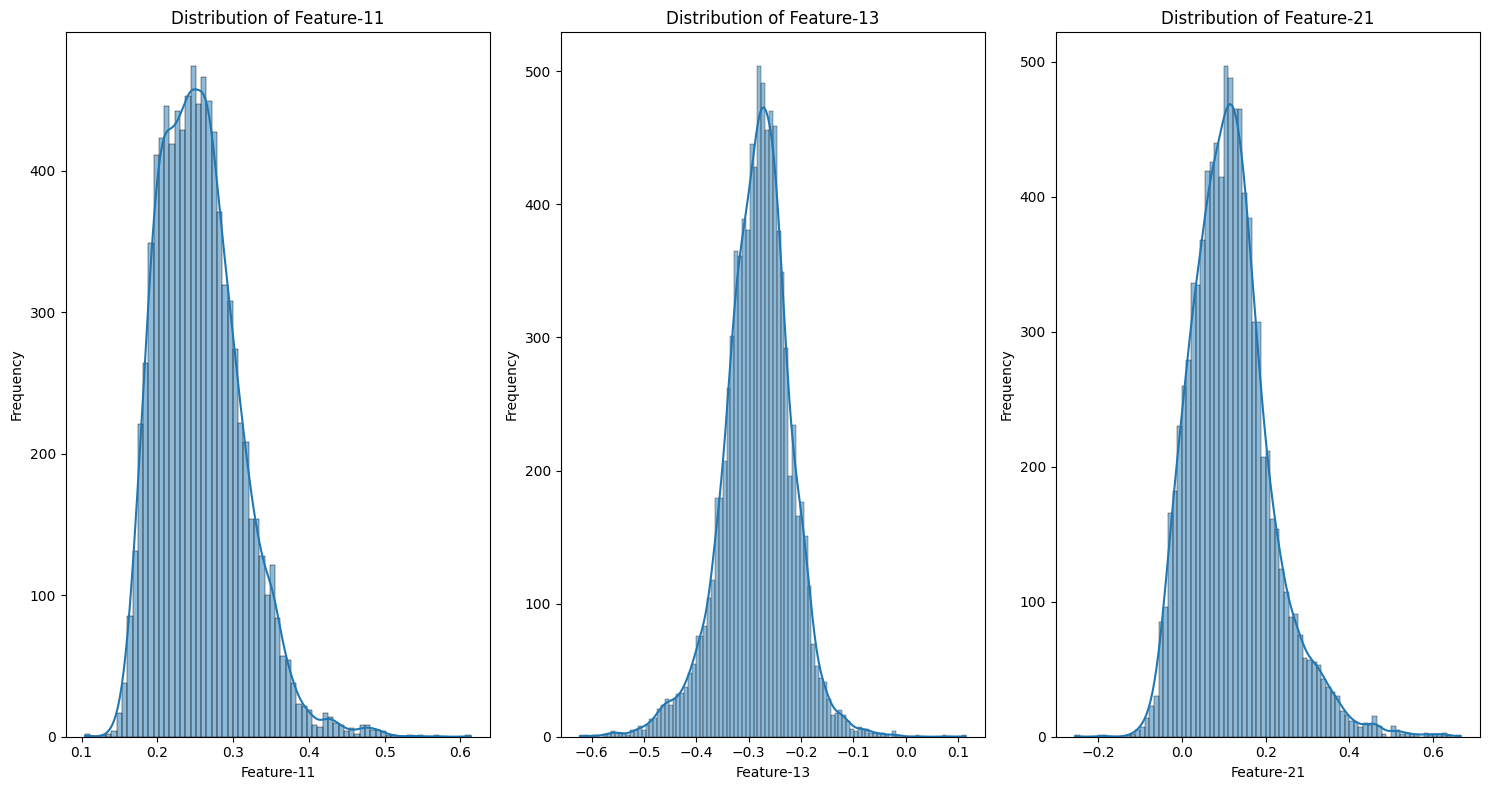

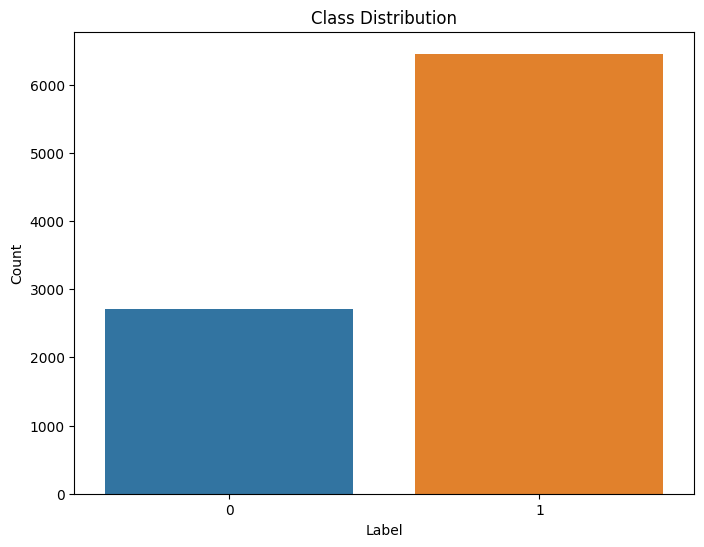

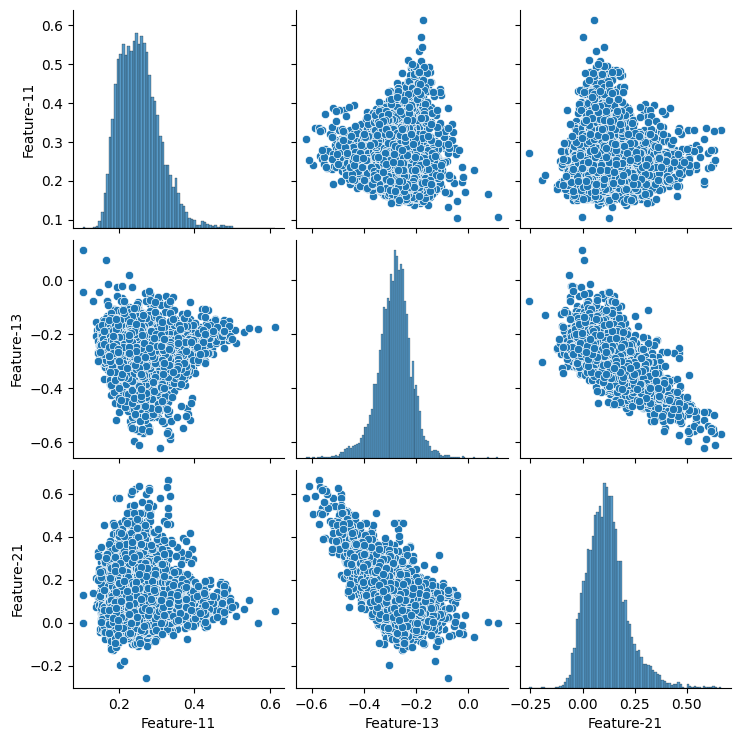

In [29]:
flag = True
while(flag):
  correlation_matrix = PearsonCorrelation(data)
  data, flag = CorrelatingFiltering(data, correlation_matrix)
FeatureInfo(data)  

-13.707202317115915 2.4010681545045456e-42
-4.0294472533933545 5.635995555895211e-05
-4.191055509028303 2.8026602643920812e-05


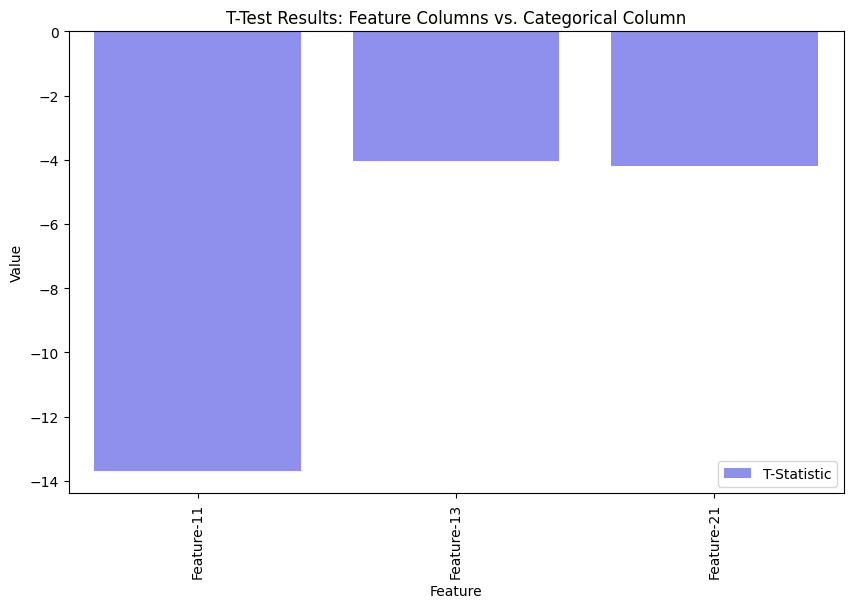

In [44]:
categorical_cols, non_categorical_cols = check_categorical_columns(data)
feature_columns = data.drop(categorical_cols[0], axis=1)
categorical_column = data[categorical_cols[0]]

# Perform T-Test to compare the means of the numerical feature column for the two categories of the binary categorical column
ttest_results = []
for column in feature_columns.columns:
    category1 = feature_columns[categorical_column == 0][column]
    category2 = feature_columns[categorical_column == 1][column]
    t_stat, p_value = ttest_ind(category1, category2)
    print(t_stat, p_value)
    ttest_results.append({'Feature': column, 'T-Statistic': t_stat, 'P-Value': p_value})

ttest_results = pd.DataFrame(ttest_results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='T-Statistic', data=ttest_results, color='blue', alpha=0.5, label='T-Statistic')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('T-Test Results: Feature Columns vs. Categorical Column')
plt.legend()
plt.show()

Παρατηρώ πως η μεταβλητή t-statistic έχει υψηλή απόλυτη τιμή για το feature-11 που σημαίνει οτι οι mean values για τις δύο κατηγορίες έχουν απόκληση μεταξύ τους μεγαλύτερη σε σχέση με τα άλλα features. 

Random Forest χειρίζεται καλά irrelevant features και είναι ανθεκτικό σε outliers